# More example uses of the onshoreWorkflow function

In [1]:
import reskit
from reskit import windpower

import geokit as gk
import pandas as pd
import numpy as np
from os.path import join

import matplotlib.pyplot as plt
%matplotlib inline

---
# Set data paths & constants

In [2]:
MERRA_SOURCE = reskit._TEST_DATA_["weather_data"]
LAND_COVER_SOURCE = reskit._TEST_DATA_["clc-aachen_clipped.tif"]
GWA_SOURCE = reskit._TEST_DATA_["gwa50-like.tif"]
PLACEMENT_SOURCE = reskit._TEST_DATA_["turbinePlacements.shp"]

BATCH_SIZE = 20000 # Total number of turbines to simulate at once (best value depends on your pc)
JOBS = 4 # The number of concurrent jobs
VERBOSE = True # When True, progress will be printed as the function executes

---
# Simulate explicit locatons with a constant turbine and hub height

In [3]:
locs = [(5.98520,50.79725),
        (5.99469,50.79421),
        (5.99411,50.80094),
        (6.00475,50.78443),
        (6.00417,50.79116),
        (6.00360,50.79789),
        (6.01309,50.79485),
        (6.01251,50.80158),
        (6.02200,50.79853),
        (6.02142,50.80526),]

Starting at: 2019-11-06 15:34:05.582331
Arranging placements at +0.00s
Convolving power curves at +0.00s
   Convolving 1 power curves...
Starting simulations at at +0.89s
 0: Starting at +0.89s
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.PS.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.SWGDN.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2MDEW.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U50M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V50M.nc4
 0: Starting batch 1 of 

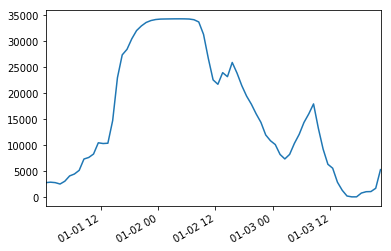

In [4]:
# Using a turine name from the TurbineLibrary
r = windpower.workflowOnshore(locs, MERRA_SOURCE, LAND_COVER_SOURCE, GWA_SOURCE, verbose=VERBOSE,
                              powerCurve="V136-3450", hubHeight=100)

r.plot()

---
# Simulate with a synthetic power curve

Starting at: 2019-11-06 15:34:07.714270
Arranging placements at +0.00s
Convolving power curves at +0.00s
   Convolving 1 power curves...
Starting simulations at at +0.90s
 0: Starting at +0.90s
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.PS.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.SWGDN.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2MDEW.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U50M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V50M.nc4
 0: Starting batch 1 of 

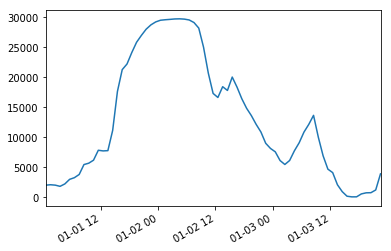

In [5]:
# Using a synthetic power curve
r = windpower.workflowOnshore(locs, MERRA_SOURCE, LAND_COVER_SOURCE, GWA_SOURCE, verbose=VERBOSE,
                              capacity=3000, rotordiam=120, hubHeight=100)
r.plot()

---
# Various extraction methods
Options are:
* "totalProduction" -> Returns the total production at each timestep (DEFAULT)
* "capacityFactor" -> Returns the average capacity factor for each simulated turbine
* "raw"  -> Returns the complete time-series production for each simulated turbine
* "batch" -> Returns nothing, but if an output file is specified a "raw" output will be created for each batch

Starting at: 2019-11-06 15:34:09.849180
Arranging placements at +0.00s
Convolving power curves at +0.00s
   Convolving 1 power curves...
Starting simulations at at +0.91s
 0: Starting at +0.91s
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.PS.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.SWGDN.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2MDEW.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U50M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V50M.nc4
 0: Starting batch 1 of 

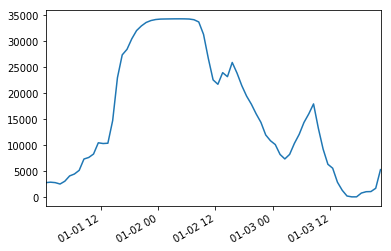

In [6]:
r = windpower.workflowOnshore(locs, MERRA_SOURCE, LAND_COVER_SOURCE, GWA_SOURCE, verbose=VERBOSE,
                                 powerCurve="V136-3450", hubHeight=100, extract="totalProduction")
r.plot()

In [7]:
r = windpower.workflowOnshore(locs, MERRA_SOURCE, LAND_COVER_SOURCE, GWA_SOURCE, verbose=VERBOSE,
                              powerCurve="V136-3450", hubHeight=100, extract="raw")

r.iloc[:5,:5]

Starting at: 2019-11-06 15:34:11.570655
Arranging placements at +0.00s
Convolving power curves at +0.00s
   Convolving 1 power curves...
Starting simulations at at +0.88s
 0: Starting at +0.88s
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.PS.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.SWGDN.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2MDEW.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U50M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V50M.nc4
 0: Starting batch 1 of 

,"(5.98520,50.79725)","(5.99469,50.79421)","(5.99411,50.80094)","(6.00475,50.78443)","(6.00417,50.79116)"
2015-01-01 00:30:00.000013+00:00,192.963547,289.473990,285.879605,143.956120,279.650180
2015-01-01 01:30:00+00:00,200.962518,299.589554,296.535066,148.697976,288.457329
2015-01-01 02:30:00.000026+00:00,195.358875,290.967243,288.405923,143.158612,279.304366
2015-01-01 03:30:00.000013+00:00,176.175536,263.677964,261.218539,127.739978,252.392621
2015-01-01 04:30:00+00:00,218.473153,321.863505,318.438489,160.215141,308.087786


In [8]:
r = windpower.workflowOnshore(locs, MERRA_SOURCE, LAND_COVER_SOURCE, GWA_SOURCE, verbose=VERBOSE,
                        powerCurve="V136-3450", hubHeight=100, extract="capacityFactor")
r.head()

Starting at: 2019-11-06 15:34:13.883458
Arranging placements at +0.00s
Convolving power curves at +0.00s
   Convolving 1 power curves...
Starting simulations at at +0.89s
 0: Starting at +0.89s
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.PS.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.SWGDN.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2MDEW.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U50M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V50M.nc4
 0: Starting batch 1 of 

(5.98520,50.79725)    0.414185
(5.99469,50.79421)    0.479711
(5.99411,50.80094)    0.477142
(6.00475,50.78443)    0.371429
(6.00417,50.79116)    0.473433
dtype: float64

---
# Simulate many locatons using multiple CPUs 

Starting at: 2019-11-06 15:35:24.101764
Arranging placements at +0.00s
Convolving power curves at +0.04s
   Convolving 1 power curves...
Starting simulations at at +2.51s
Submitting 4 simulation groups at +2.70s
Finished simulating 10000 turbines at +19.30s (518.26 turbines/sec)


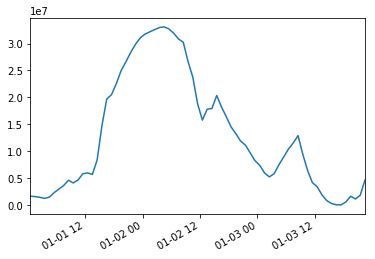

In [10]:
locs = np.column_stack([
    np.linspace(6.0,6.5,10000),  # 10,000 longitudes points
    np.linspace(50.4,51.0,10000) # 10,000 latitudes points
])


r = windpower.workflowOnshore(locs, MERRA_SOURCE, LAND_COVER_SOURCE, GWA_SOURCE, verbose=VERBOSE,
                        powerCurve="V136-3450", hubHeight=100, batchSize=BATCH_SIZE, jobs=JOBS)

r.plot()

---
# Simulate all locations given in a point-type vector file

Starting at: 2019-11-06 15:36:32.320580
Arranging placements at +0.00s
Convolving power curves at +0.06s
   Convolving 1 power curves...
Starting simulations at at +2.51s
Submitting 4 simulation groups at +2.61s
Finished simulating 560 turbines at +5.55s (100.99 turbines/sec)


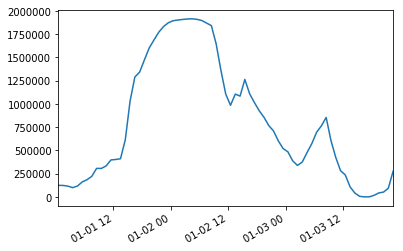

In [12]:
r = windpower.workflowOnshore(PLACEMENT_SOURCE, MERRA_SOURCE, LAND_COVER_SOURCE, GWA_SOURCE, 
                              powerCurve="V136-3450", hubHeight=100, batchSize=BATCH_SIZE, jobs=JOBS)

r.plot()

---
# Filter locations before simulating

Original turbine count: 560
Post-filter turbine count: 116
Starting at: 2019-11-06 15:39:27.863350
Arranging placements at +0.00s
Convolving power curves at +0.00s
   Convolving 1 power curves...
Starting simulations at at +2.45s
Submitting 4 simulation groups at +2.53s
Finished simulating 116 turbines at +4.78s (24.28 turbines/sec)


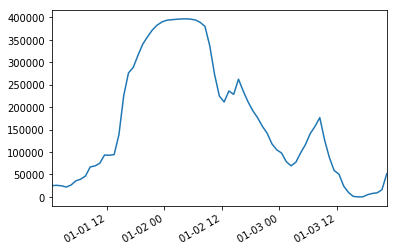

In [17]:
# Load placements into a dataframe
locs = gk.vector.extractFeatures(PLACEMENT_SOURCE, outputSRS="latlon")
print("Original turbine count:", locs.shape[0])

# Do whatever filtering you want...
locs['lon'] = [g.GetX() for g in locs.geom]
locs = locs[locs.lon<=6.1]
print("Post-filter turbine count:", locs.shape[0])

# Simulate...
r = windpower.workflowOnshore(locs, MERRA_SOURCE, LAND_COVER_SOURCE, GWA_SOURCE, verbose=VERBOSE,
                        powerCurve="V136-3450", hubHeight=100, jobs=JOBS, batchSize=BATCH_SIZE)

r.plot()

---
# Unique definitions for each turbine

PLACEMENTS:
       lon       lat  hubHeight powerCurve
0  6.00000  50.40000    49.0000  E-126_EP4
1  6.00005  50.40006    49.0003  V136-3450
2  6.00010  50.40012    49.0006  E-126_EP4
3  6.00015  50.40018    49.0009  V136-3450
4  6.00020  50.40024    49.0012  E-126_EP4
5  6.00025  50.40030    49.0015  V136-3450
6  6.00030  50.40036    49.0018  E-126_EP4
7  6.00035  50.40042    49.0021  V136-3450
8  6.00040  50.40048    49.0024  E-126_EP4
9  6.00045  50.40054    49.0027  V136-3450

SIMULATION:
Starting at: 2019-11-06 15:42:42.788860
Arranging placements at +0.00s
Convolving power curves at +0.04s
   Convolving 2 power curves...
Starting simulations at at +38.82s
Submitting 4 simulation groups at +39.09s
Finished simulating 10000 turbines at +60.82s (164.42 turbines/sec)


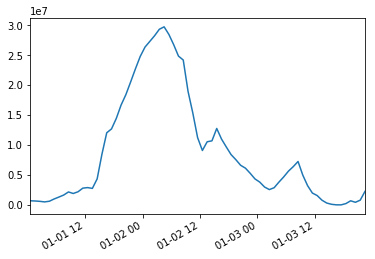

In [19]:
# Give a turbine name to each placement
locs = pd.DataFrame()
locs["lon"] = np.linspace(6.0,6.5,10000)             # latitude column MUST be given as 'lat'
locs["lat"] = np.linspace(50.4,51.0,10000)           # longitude column MUST be given as 'lon'
locs["hubHeight"] = np.linspace(49,52,10000)         # hub height column can be given, but must 
                                                     #  be named as 'hubHeight'
locs["powerCurve"] = ["E-126_EP4", "V136-3450"]*5000 # turbine name column can be given, but must
                                                     #  be named as either 'turbine' or 'powerCurve'
print("PLACEMENTS:")
print(locs.head(10))

print("\nSIMULATION:")
r = windpower.workflowOnshore(locs, MERRA_SOURCE, LAND_COVER_SOURCE, GWA_SOURCE, verbose=VERBOSE,
                              batchSize=BATCH_SIZE, jobs=JOBS)

r.plot()

PLACEMENTS:
        lon        lat  hubHeight     capacity  rotordiam
0  6.000000  50.400000  49.000000  3340.122083      120.0
1  6.000501  50.400601  49.003003  3703.884521      120.0
2  6.001001  50.401201  49.006006  3618.127097      120.0
3  6.001502  50.401802  49.009009  3930.426458      120.0
4  6.002002  50.402402  49.012012  3232.056574      120.0
5  6.002503  50.403003  49.015015  3399.501262      120.0
6  6.003003  50.403604  49.018018  3103.187034      120.0
7  6.003504  50.404204  49.021021  3747.345704      120.0
8  6.004004  50.404805  49.024024  3390.563947      120.0
9  6.004505  50.405405  49.027027  3497.765151      120.0

SIMULATION:
Starting at: 2019-11-06 15:48:15.902894
Arranging placements at +0.00s
Convolving power curves at +0.02s
   Convolving 90 power curves...
Starting simulations at at +59.91s
Submitting 4 simulation groups at +60.06s
Finished simulating 1000 turbines at +71.55s (13.98 turbines/sec)


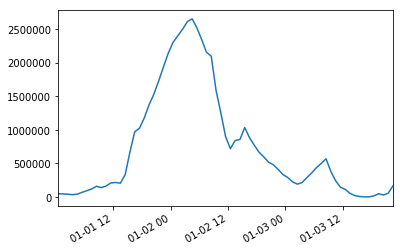

In [23]:
# Generate a synthetic power curve for each placement
N = 1000
locs = pd.DataFrame()
locs["lon"] = np.linspace(6.0,6.5,N)        # latitude column MUST be given as 'lat'
locs["lat"] = np.linspace(50.4,51.0,N)      # longitude column MUST be given as 'lon'
locs["hubHeight"] = np.linspace(49,52,N)    # hub height column must be named as 'hubHeight'
locs["capacity"] = np.random.uniform(3000,4000,N) # capacity column must be named as 'capacity'
locs["rotordiam"] = np.ones(N)*120          # rotor diameter column must be named as 'rotordiam'

print("PLACEMENTS:")
print(locs.head(10))

print("\nSIMULATION:")
r = windpower.workflowOnshore(locs, MERRA_SOURCE, LAND_COVER_SOURCE, GWA_SOURCE, verbose=VERBOSE,
                               batchSize=BATCH_SIZE, jobs=JOBS)

r.plot()